# Histogram with Gray image

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

### Read Imaged

In [21]:
image_Path = r'D:\py\Digital_Image_Processing\Image\XLA.jpg'
I = cv2.imread(image_Path, cv2.IMREAD_GRAYSCALE)

### Show image histogram

In [22]:
# Histogram calculation -> cv2.calcHist([images], [channels], mask, [histSize], [ranges], accumulate=False)
hist_Image = cv2.calcHist([I], [0], None, [256], [0, 256])

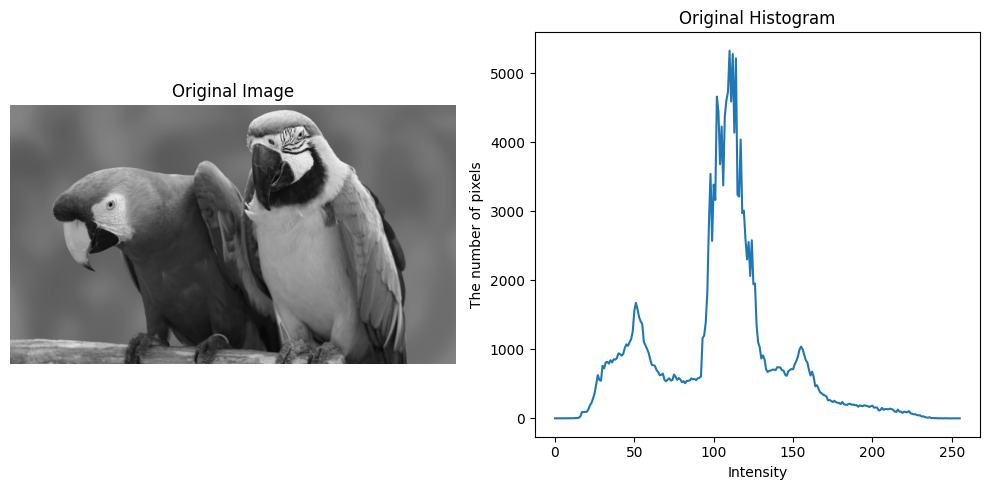

In [23]:
# Original image
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.imshow(I, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

# Histogram of Original image
plt.subplot(1, 2, 2)
plt.plot(hist_Image)
plt.title('Original Histogram')
plt.ylabel('The number of pixels')
plt.xlabel('Intensity')
plt.tight_layout()

### Equalize image histogram & show 

In [24]:
# Histogram equalize
equalized_Image = cv2.equalizeHist(I)

In [25]:
# Histogram calculation after equalized
equalized_hist_Image = cv2.calcHist([equalized_Image], [0], None, [256], [0, 256])

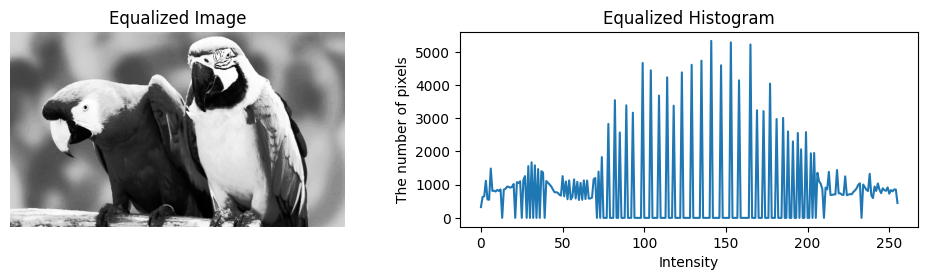

In [26]:

# Equalized Image
plt.figure(figsize = (10, 5))
plt.subplot(2, 2, 3)
plt.imshow(equalized_Image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

# Histogram after equalized
plt.subplot(2, 2, 4)
plt.plot(equalized_hist_Image)
plt.title('Equalized Histogram')
plt.ylabel('The number of pixels')
plt.xlabel('Intensity')
plt.tight_layout()

# Histogram with RGB image

### Method 1: Equalize each channel of RGB

In [27]:
I_RGB = cv2.imread(image_Path, cv2.IMREAD_COLOR_RGB)
r, g, b = cv2.split(I_RGB)

r_equalized = cv2.equalizeHist(r)
g_equalized = cv2.equalizeHist(g)
b_equalized = cv2.equalizeHist(b)

rgb_equalized_Image = cv2.merge([r_equalized, g_equalized, b_equalized])

(np.float64(-0.5), np.float64(599.5), np.float64(348.5), np.float64(-0.5))

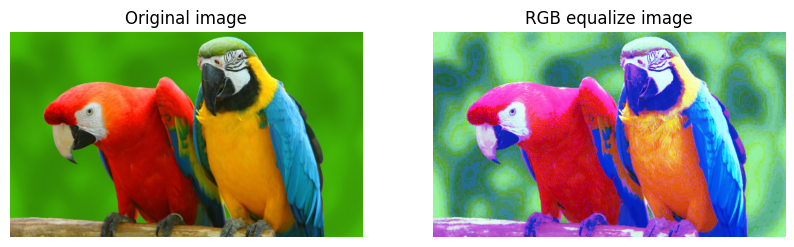

In [28]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(I_RGB)
plt.title('Original image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rgb_equalized_Image)
plt.title('RGB equalize image')
plt.axis('off')

### Method 2: Covert RGB to YCrCb and equalize

In [29]:
I_YCrCb = cv2.cvtColor(I_RGB, cv2.COLOR_RGB2YCrCb)

I_YCrCb[:, :, 0] = cv2.equalizeHist(I_YCrCb[:, :, 0])

YCrCb_equalize_Image = cv2.cvtColor(I_YCrCb, cv2.COLOR_YCrCb2RGB)

(np.float64(-0.5), np.float64(599.5), np.float64(348.5), np.float64(-0.5))

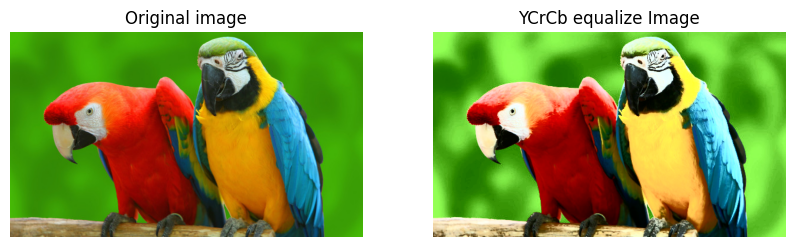

In [30]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(I_RGB)
plt.title('Original image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(YCrCb_equalize_Image)
plt.title('YCrCb equalize Image')
plt.axis('off')